In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# AGENDA


*   The difference between Logistic Regression and Softmax Regression
*   Train and evaluate a Logistic Regression Model using Keras
*   Train and evaluate a Softmax Regression Model using Keras

Online latex equation editor:

https://latex.codecogs.com/legacy/eqneditor/editor.php



#Logistic Regression


**Linear Regression Recap**

$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$
- $y$ is the output
- $\theta_0$ is the intercept (bias)
- $\theta_1$ is the coefficient (weight) for $x_1$ (the first feature)
- $\theta_n$ is the coefficient (weight) for $x_n$ (the nth feature)

**Logistic Regression**

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$y = \sigma(z)$

-   $\sigma$ is the activation function (**Sigmoid**, Tanh, ...)


**Sigmoid Activation**

$\sigma(z) = \frac{1}{1+e^{-z}}$


**Binary Cross-entropy Loss**

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}(y_{i}\log(\hat{y}_{i}) + (1-y_{i})\log(1-\hat{y}_{i})$
-    log(z) $=$ ln(z)


# Keras

**Main Components**

*   **Model**


```
from tensorflow.keras.models import Model, Sequential
```


*   **Layer**


```
from tensorflow.keras.layers import Dense, Activation, ...
```


*   **Optimizer**

```
from tensorflow.keras.optimizers import Adam, SGD, ...
```
*   **Loss function**
*   **Metrics**
*   Callbacks (in later session)

# Exercise 1: A Simple Logistic Regression

In [ ]:
import matplotlib.pyplot as plt # for drawing chart

In [ ]:
import numpy as np 
import pandas as pd

# TODO:
# 1. define a path to dataset

PATH = ('/content/drive/My Drive/Colab Notebooks/s2_logistic_data.csv')
data = pd.read_csv(PATH)
data

,x_1,x_2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
# print out the datatype and check null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     100 non-null    float64
 1   x_2     100 non-null    float64
 2   y       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
# print out the statistic of data
data.describe()

,x_1,x_2,y
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
# from dataframe to numpy array
# iloc[:,:2] means get all values from columns 0 to 1
X=data.iloc[:,:2].values
y=data.iloc[:,-1].values
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (100, 2)
Shape of y: (100,)


In [ ]:
# print(len(np.where(y==0)[0]))
# print(len(np.where(y==1)[0]))

40
60


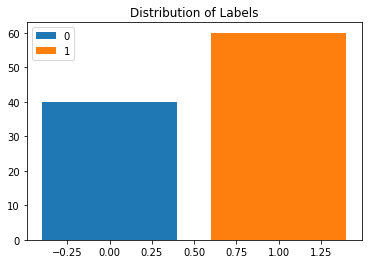

In [ ]:
# draw the distribution of data
# np.where(condition) return all indices matched the condition
# np.where(condition, value if true, value if false) replace all values 
# matched the condition
plt.bar(0, len(np.where(y==0)[0]))
plt.bar(1, len(np.where(y==1)[0]))
plt.title('Distribution of Labels')
plt.legend([0,1])
plt.show()

In [ ]:
# print(X[np.where(y==0),0])
# print(X[np.where(y==0),1])
# print(X[np.where(y==1),0])
# print(X[np.where(y==1),1])

[[34.62365962 30.28671077 35.84740877 45.08327748 95.86155507 75.01365839
  39.53833914 67.94685548 67.37202755 50.53478829 34.21206098 93.1143888
  61.83020602 38.7858038  52.10797973 40.23689374 54.63510555 33.91550011
  74.78925296 34.18364003 51.54772027 82.36875376 51.04775177 62.22267576
  34.52451385 50.28649612 49.58667722 32.57720017 35.28611282 56.2538175
  30.05882245 44.66826172 66.56089447 49.07256322 32.72283304 60.45555629
  82.22666158 42.07545454 52.34800399 55.48216114]]
[[78.02469282 43.89499752 72.90219803 56.31637178 38.22527806 30.60326323
  76.03681085 46.67857411 42.83843832 48.85581153 44.2095286  38.80067034
  50.25610789 64.99568096 63.12762377 71.16774802 52.21388588 98.86943574
  41.57341523 75.23772034 46.85629026 40.61825516 45.82270146 52.06099195
  60.39634246 49.80453881 59.80895099 95.59854761 47.02051395 39.26147251
  49.59297387 66.45008615 41.09209808 51.88321182 43.30717306 42.50840944
  42.71987854 78.844786   60.76950526 35.57070347]]
[[60.18259

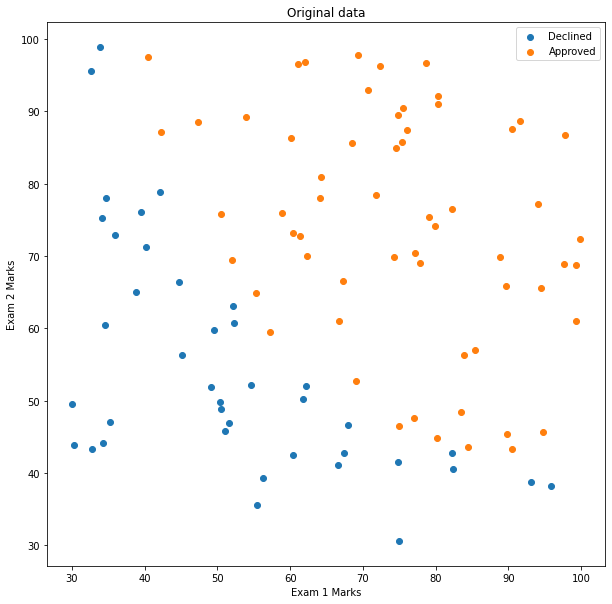

In [ ]:
# plot the original dataset
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(y==0),0], X[np.where(y==0),1])
plt.scatter(X[np.where(y==1),0], X[np.where(y==1),1])
plt.legend(['Declined','Approved'])
plt.title('Original data')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

In [ ]:
# TODO:
# 1. import train_test_split from sklearn
# 2. split data to train and test set (test_size=0.2, random_state=1612)
#### YOUR CODE HERE *****
# 1/ Scale into train test by fit_transform, transform
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 2/ Scale
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1612)

print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X test', X_test.shape)
print('Shape of y test', y_test.shape)

Shape of X train (80, 2)
Shape of y train (80,)
Shape of X test (20, 2)
Shape of y test (20,)


In [ ]:
from sklearn.preprocessing import StandardScaler # Scale function

# define the scaler (x = (x - mean(x)) / theta) --> sacale về từ -3 tới 3
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # x_train = (x_train - mean_train) / theta_train --> use scaler.fit_transform to calculate mean_train, theta_train
X_test_scaled = scaler.transform(X_test) # x_test = (x_test - mean_train) / theta_train --> use only scaler.transform to know in reality how it performs (not use mean_test, theta_test)

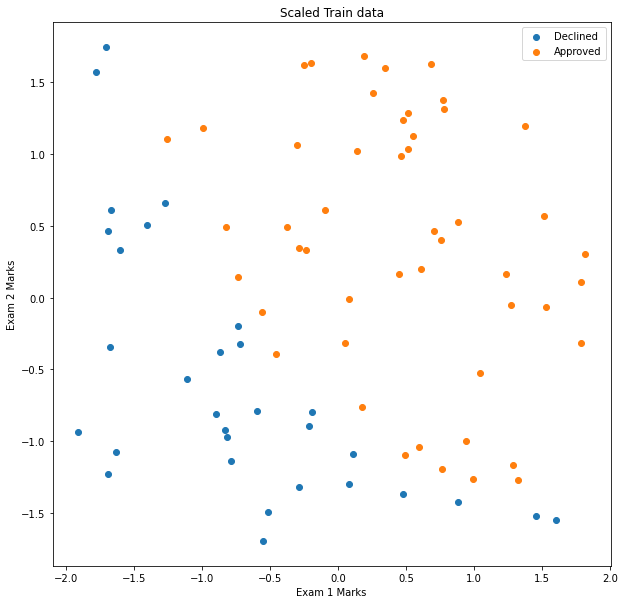

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_scaled[np.where(y_train==0),0], X_train_scaled[np.where(y_train==0),1])
plt.scatter(X_train_scaled[np.where(y_train==1),0], X_train_scaled[np.where(y_train==1),1])
plt.legend(['Declined','Approved'])
plt.title('Scaled Train data')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

In [ ]:
# 2/ Define Model by Sequential
from tensorflow.keras.models import Sequential # a simple model Class in Keras
from tensorflow.keras.layers import Dense, Activation # layers Class in keras # Activation (softmax / sigmoid)
from tensorflow.keras.optimizers import SGD # Search algorithm
from tensorflow.keras.initializers import constant # Init weights as a constant

# define Logistic Regression model using Sequential (as Binary)
model = Sequential()
# input_shape = shape of the features of X
# kernel_initialier = how to initialize the default value of this layer's weights
# in this case init = 0
# default bias init = 0
# Output là 1 (Passed or Failed, True/ False) --> use Binary Sigmoid Logistic Regression. Output là 3 (cam, quyt1, ổi) trở lên thì dùng Softmax
model.add(Dense(1, input_shape=(X_train_scaled.shape[1:]), kernel_initializer=constant(0))) # Dense ~ w*x + b # 1 là 1 nod (số output) #shape[1:] là số features, # kernel bài simple thì 0 or 1 để mọi người ra kết quả chung. Còn ko thì số random
model.add(Activation('sigmoid')) # bài cũ Linear Regression thì del line này
# print out the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


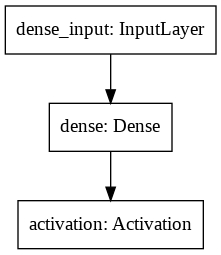

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png')

In [ ]:
# define the optimizer
# in this case: Stochastic Gradient Descent with learning rate = 0.01
sgd_optim = SGD(lr=0.01) # learn later

# 3/ Compile
# compile model using binary_crossentropy loss with SGD optimizer and using 
# accuracy for performance measure
model.compile(loss='binary_crossentropy', optimizer=sgd_optim, metrics='accuracy') # accuracy là xác suất đúng % # bài cũ: loss = mean squared error, metrics = mean squared error)

# 4/ Train
# start the training on Train Set on 10 epochs
# batch_size = X_train_scaled.shape[0] to simulate Batch Gradient Descent
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=X_train_scaled.shape[0]) #epochs số lần muốn train 

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.3875
Epoch 2/10
1/1 [==============================] - 0s 808us/step - loss: 0.6917 - accuracy: 0.8750
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.8750
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 0s 717us/step - loss: 0.6874 - accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.8750
Epoch 7/10
1/1 [==============================] - 0s 707us/step - loss: 0.6846 - accuracy: 0.8750
Epoch 8/10
1/1 [==============================] - 0s 999us/step - loss: 0.6832 - accuracy: 0.8750
Epoch 9/10
1/1 [==============================] - 0s 1000us/step - loss: 0.6818 - accuracy: 0.8750
Epoch 10/10
1/1 [==============================] - 0s 929us/step - loss: 0.6804 - accuracy: 0.8750


In [ ]:
# evaluate model performance on test set
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 937us/step - loss: 0.6762 - accuracy: 0.9500


[0.6762343645095825, 0.949999988079071]

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.02790551],
        [0.02261917]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.01112429], dtype=float32)>]

In [ ]:
weights = model.get_weights()[0]
bias = model.get_weights()[1]
# print(weights)
# print(bias)
print('Weights:', np.squeeze(weights))
print('Bias:',np.squeeze(bias))

[[0.02790551]
 [0.02261917]]
[0.01112429]
Weights: [0.02790551 0.02261917]
Bias: 0.011124294


In [ ]:
# print(np.min(X_test_scaled[:,0]))
# print(np.max(X_test_scaled[:,0]))
# print(np.expand_dims(decision_x, axis=1))
# print(np.dot(np.expand_dims(decision_x, axis=1), weights[0]))
# print(weights[0])
# print(weights[1])
# decision_y = - (bias + np.dot(np.expand_dims(decision_x, axis=1), weights[0])) / weights[1]
# print(decision_y)

-1.902168610880638
1.7084290783891634
[[-1.90216861]
 [ 1.67536857]]
[-0.05308098  0.04675201]
[0.02790551]
[0.02261917]
[ 1.85491763 -2.55872865]


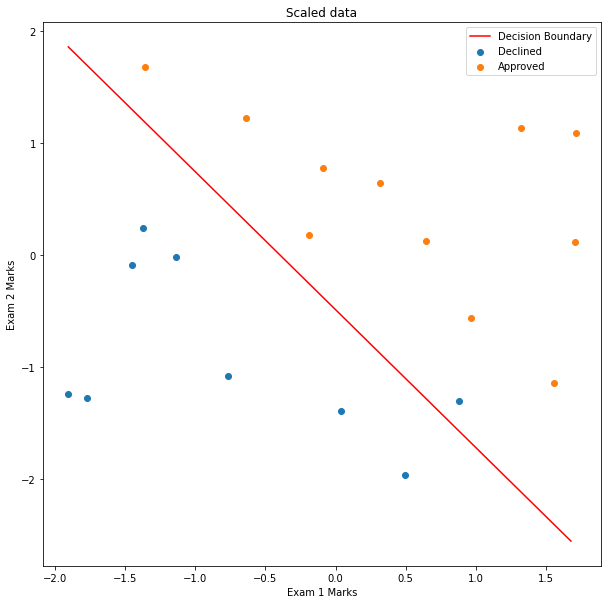

In [ ]:
decision_x = [np.min(X_test_scaled[:,0]), np.max(X_test_scaled[:,1])]
decision_y = - (bias + np.dot(np.expand_dims(decision_x, axis=1), weights[0])) / weights[1] # https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
plt.figure(figsize=(10,10))
plt.scatter(X_test_scaled[np.where(y_test==0),0], X_test_scaled[np.where(y_test==0),1])
plt.scatter(X_test_scaled[np.where(y_test==1),0], X_test_scaled[np.where(y_test==1),1])
plt.plot(decision_x, decision_y, c='red')
plt.legend(['Decision Boundary','Declined','Approved'])
plt.title('Scaled data')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.show()

# **Softmax Regression**

**Softmax Regression**

$z = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$y = \sigma(z)$

-   $\sigma$ is the **Softmax** activation

**Softmax Activation**

$\sigma(z) = \frac{exp(z_{i})}{\sum_{i=1}^{C}exp(z_{i})}$
-   exp(z) $= e^z$
-   C: Number of classes


In [ ]:
%reset -f

# Excercise 2: Digits classification

In [ ]:
import numpy as np
from tensorflow.random import set_seed
np.random.seed(1612)
set_seed(1612) #  This sets the global seed.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train = X_train[..., None] # Trick: from 28x28 to 28x28x1 # hình nên thêm x1
  X_test = X_test[..., None] # Trick: from 28x28 to 28x28x1 (trick để x1)
# TODO:
# 1. Change type of X_train, X_test from uint to float
# 2. Scale X_train, X_test to [0,1] # Scale điểm ảnh trắng đen thì chỉ có 0, 1 thay vì từ -3 đến 3 # Hình là 1 byte = 8-bit mã hoá thành từ 0 tới 255
# 3. One hot encoding y_train, y_test
###### YOUR CODE HERE *****  
  # 1/
  X_train = X_train.astype(np.float32)
  X_test = X_test.astype(np.float32)
  # 2/
  X_train = X_train / 255 # One hot encoding để so sánh xác suất
  X_test = X_test / 255 # hình thì ko ra số âm
  # 3/ 
  y_train = to_categorical(y_train, 10) # 10 là từ 0 - 9
  y_test = to_categorical(y_test, 10)
  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_data()
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28, 1)
Shape of y train: (60000, 10)
Shape of X test: (10000, 28, 28, 1)
Shape of y test: (10000, 10)


In [ ]:
# Debug
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
# Debug
for i in range(10):
  for j in range(10):
    print(np.argmax(y_train, axis=1))
    print(np.where(np.argmax(y_train, axis=1) == i))
    print(np.where(np.argmax(y_train, axis=1) == i)[0])
    print(np.random.choice(np.where(np.argmax(y_train, axis=1) == i)[0]))

[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
15704
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
19117
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
27280
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
42674
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
12103
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
57162
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
27411
[5 0 4 ... 5 6 8]
(array([    1,    21,    34, ..., 59952, 59972, 59987]),)
[    1    21    34 ... 59952 59972 59987]
38540
[5 0 4 .

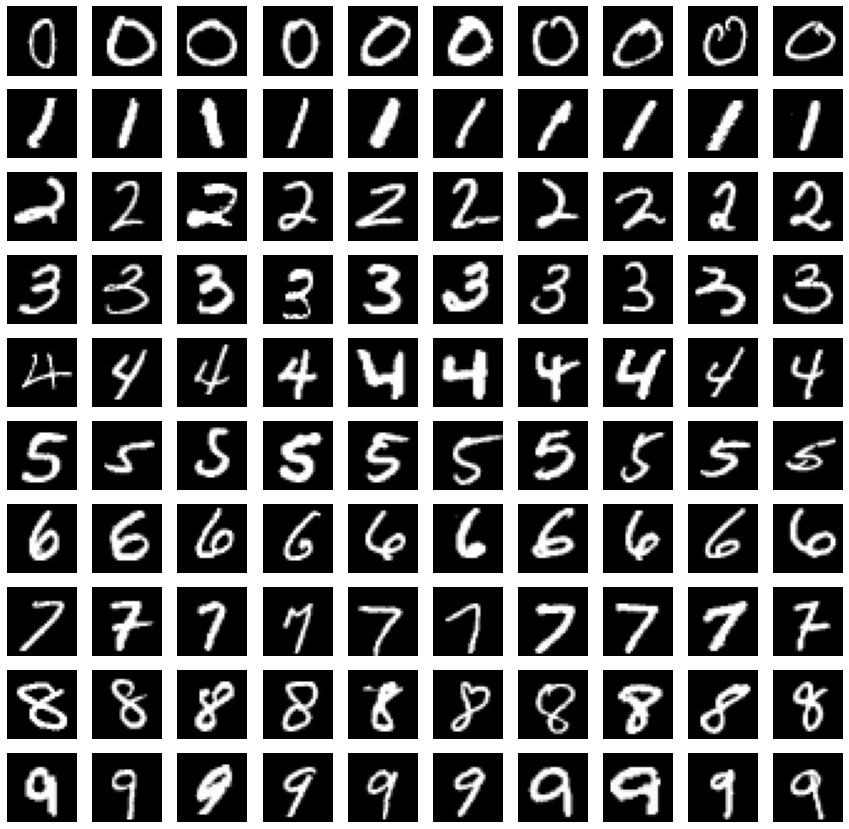

In [ ]:
# PLOT SOME IMAGES
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10,10)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(np.argmax(y_train, axis=1) == i)[0]) # np.random.choice: Generates a random sample from a given 1-D array
    axs[i][j].grid('off') # Hide grid lines
    axs[i][j].axis('off') # Turn the axes off 
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    #axs[i][j].set_title('Number:',j)

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense # Learn later Conv2D, Maxpool2D
from tensorflow.keras.models import Sequential

def pre_defined_model(input_shape):
  model = Sequential()
  model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(32,(3,3), padding='same', activation='relu')) 
  model.add(MaxPool2D())
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D())
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  return model

In [ ]:
# Debug
X_train.shape[1:]

(28, 28, 1)

In [ ]:
# Debug
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# Create Softmax Model:
softmax_model = pre_defined_model(X_train.shape[1:]) # input_shape file hình thì n x n x 1

In [ ]:
# TODO:
# 1. Add a softmax layer to model
softmax_model.add(Dense(10, activation='softmax'))
# 2. print out model using summary() function
softmax_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
#TODO:
#1. compile model using loss='categorical_crossentropy', optimizer='adam', metrics='accuracy' # adam is advanced version of Gradient Descent
softmax_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # dùng cross entropy nhưng vẫn thêm accuracy dù accuracy khó optimize
#2. Fit model on X_train, y_train and 5 epochs
softmax_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0991 - accuracy: 0.9694
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0141 - accuracy: 0.9956


In [ ]:
# TODO:
#1. Evaluate softmax_model on test set
softmax_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9920


[0.02645179070532322, 0.9919999837875366]

In [ ]:
# Debug
print(len(y_test))

10000


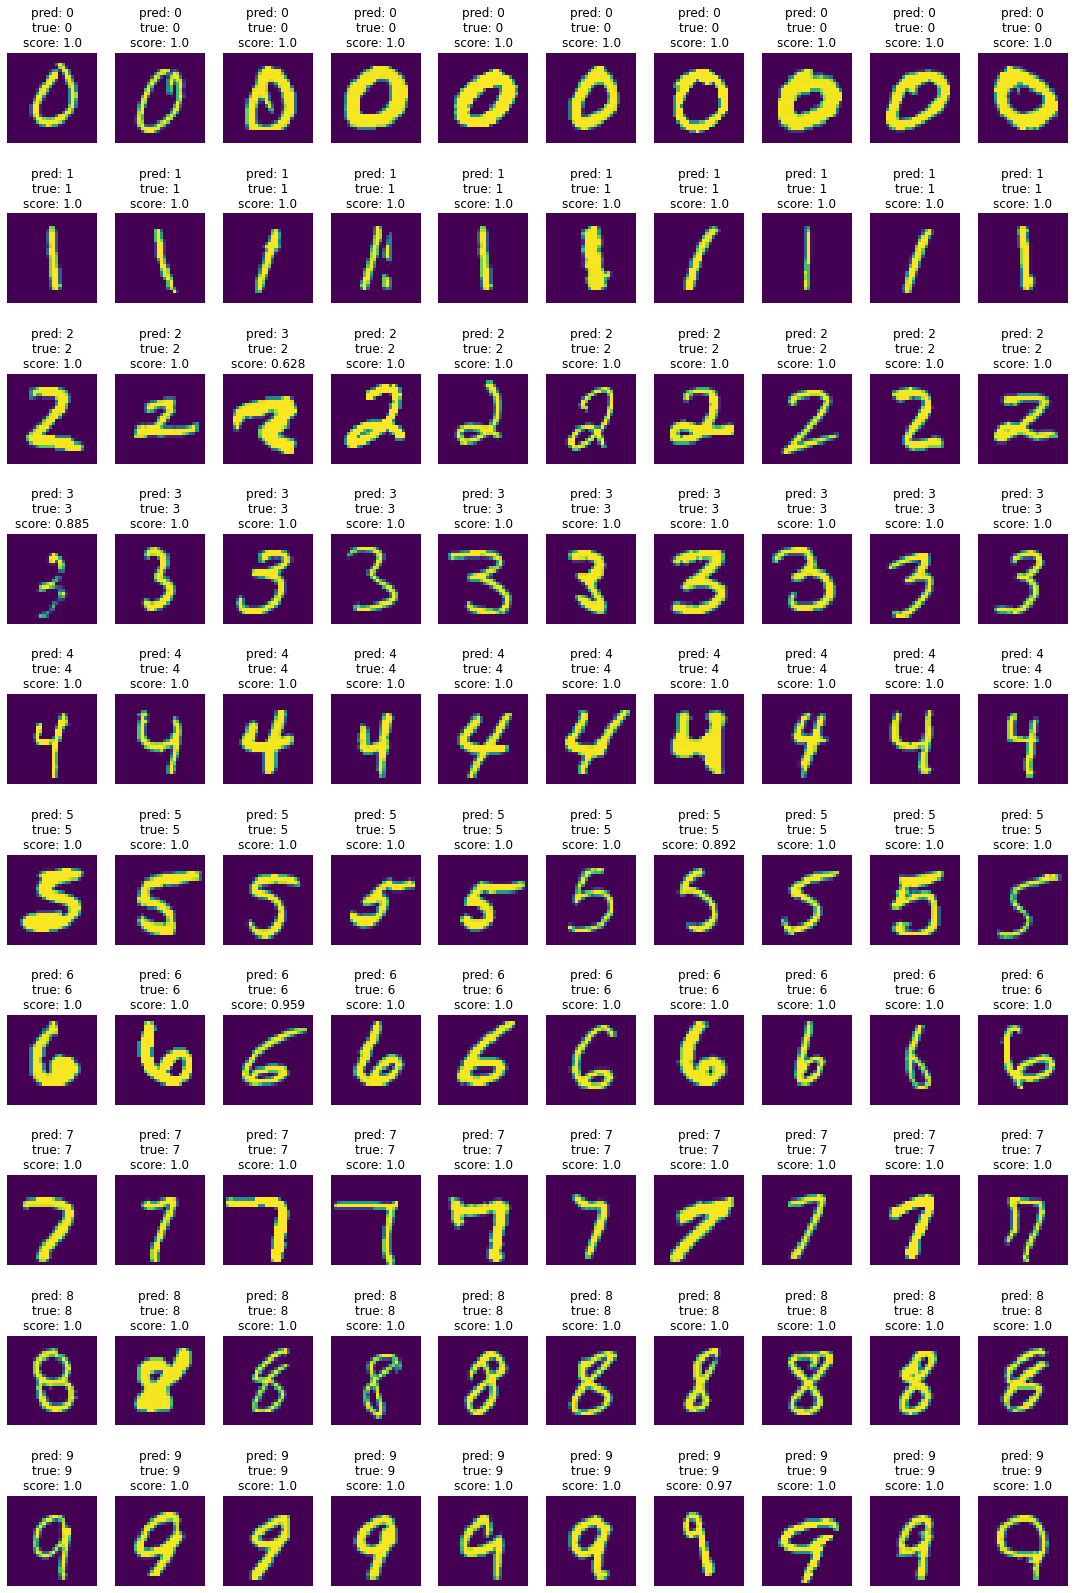

In [ ]:
# Print output in color
fig, axs = plt.subplots(10,10)
fig.set_figheight(3 * 10 - 1)
fig.set_figwidth(2 * 10 - 1)
for i in range(10):
  for j in range(10):
    #random_index = np.random.randint(0, len(y_test))

    target = np.random.choice(np.where(np.argmax(y_test, axis=1) == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    temp = X_test[target]
    temp = temp[None,...]
    pred = softmax_model.predict(temp)[0]
  #  print(i,j,pred)
    axs[i][j].imshow(np.squeeze(X_test[target]))
    axs[i][j].set_title("pred: {}\ntrue: {}\nscore: {:.3}".format(
              np.argmax(pred), np.argmax(y_test[target]), np.max(pred)
    ))